In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

print('# File sizes')
for f in os.listdir('./Desktop/openSW/input/'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('./Desktop/openSW/input/' + f) / 1000000, 2)) + 'MB')

# File sizes
clicks_test.csv               506.95MB
clicks_train.csv              1486.73MB
event.csv                     0.01MB


In [2]:
df_train = pd.read_csv('./Desktop/openSW/input/clicks_train.csv')
df_test = pd.read_csv('./Desktop/openSW/input/clicks_test.csv')

Text(0, 0.5, 'Proportion of set')

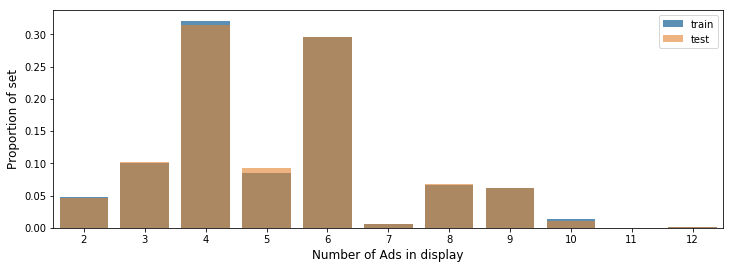

In [3]:
sizes_train = df_train.groupby('display_id')['ad_id'].count().value_counts()
sizes_test = df_test.groupby('display_id')['ad_id'].count().value_counts()
sizes_train = sizes_train / np.sum(sizes_train)
sizes_test = sizes_test / np.sum(sizes_test)

plt.figure(figsize=(12,4))
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8, color=p[0], label='train')
sns.barplot(sizes_test.index, sizes_test.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

Ads that appear less than 2 times: 22.69%
Ads that appear less than 10 times: 61.74%
Ads that appear less than 50 times: 86.93%
Ads that appear less than 100 times: 91.04%
Ads that appear less than 1000 times: 97.45%


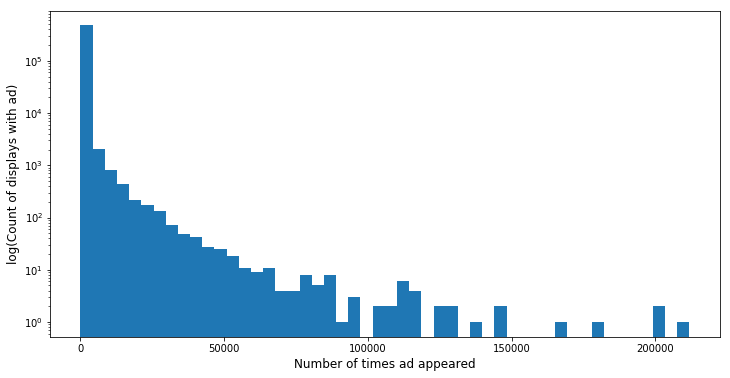

In [4]:
ad_usage_train = df_train.groupby('ad_id')['ad_id'].count()

for i in [2, 10, 50, 100, 1000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((ad_usage_train < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(ad_usage_train.values, bins=50, log=True)
plt.xlabel('Number of times ad appeared', fontsize=12)
plt.ylabel('log(Count of displays with ad)', fontsize=12)
plt.show()

In [5]:
ad_prop = len(set(df_test.ad_id.unique()).intersection(df_train.ad_id.unique())) / len(df_test.ad_id.unique())
print('Proportion of test ads in test that are in training: {}%'.format(round(ad_prop * 100, 2)))

Proportion of test ads in test that are in training: 82.87%


In [8]:
try:del df_train,df_test # Being nice to Azure
except:pass;gc.collect()

events = pd.read_csv('./Desktop/openSW/input/events.csv')
print('Shape:', events.shape)
print('Columns', events.columns.tolist())
events.head()

c:\users\hyuntaek\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape: (23120126, 6)
Columns ['display_id', 'uuid', 'document_id', 'timestamp', 'platform', 'geo_location']


,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [9]:
plat = events.platform.value_counts()

print(plat)
print('\nUnique values of platform:', events.platform.unique())

2     10684579
1      8747280
3      3032907
2       291699
1       279988
3        83668
\N           5
Name: platform, dtype: int64

Unique values of platform: [3 2 1 '2' '1' '3' '\\N']


Text(0, 0.5, 'Occurence count')

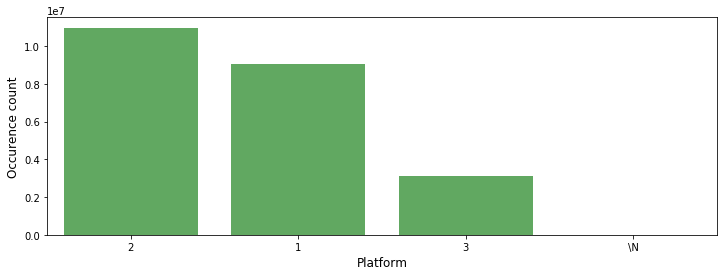

In [10]:
events.platform = events.platform.astype(str)
plat = events.platform.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(plat.index, plat.values, alpha=0.8, color=p[2])
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Occurence count', fontsize=12)

uuid
ef7761dd22277c    38
45d23867dbe3b3    38
c0bd502c7a479f    42
2759b057797f02    46
b88553e3a2aa29    49
Name: uuid, dtype: int64
Users that appear less than 2 times: 88.42%
Users that appear less than 5 times: 99.51%
Users that appear less than 10 times: 99.96%


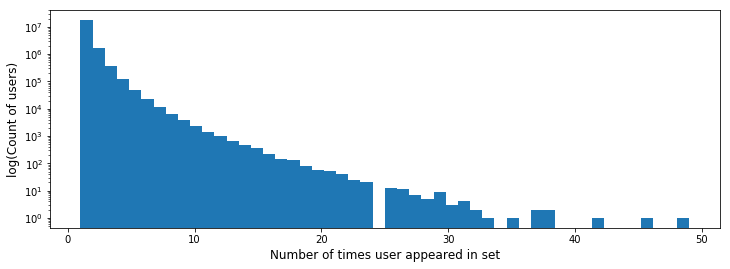

In [11]:
uuid_counts = events.groupby('uuid')['uuid'].count().sort_values()

print(uuid_counts.tail())

for i in [2, 5, 10]:
    print('Users that appear less than {} times: {}%'.format(i, round((uuid_counts < i).mean() * 100, 2)))
    
plt.figure(figsize=(12, 4))
plt.hist(uuid_counts.values, bins=50, log=True)
plt.xlabel('Number of times user appeared in set', fontsize=12)
plt.ylabel('log(Count of users)', fontsize=12)
plt.show()

In [12]:
try:del events
except:pass;gc.collect()

topics = pd.read_csv('./Desktop/openSW/input/documents_topics.csv')
print('Columns:',topics.columns.tolist())
print('Number of unique topics:', len(topics.topic_id.unique()))

topics.head()

Columns: ['document_id', 'topic_id', 'confidence_level']
Number of unique topics: 300


,document_id,topic_id,confidence_level
0,1595802,140,0.073113
1,1595802,16,0.059416
2,1595802,143,0.045421
3,1595802,170,0.038867
4,1524246,113,0.196450


Number of topics that appear more than 10000 times: 201
Number of topics that appear more than 50000 times: 86
Number of topics that appear more than 100000 times: 22
Number of topics that appear more than 200000 times: 3


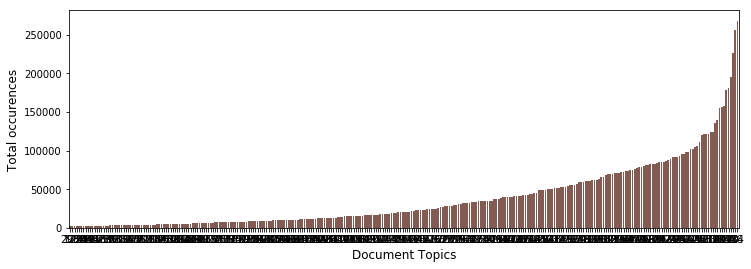

In [13]:
topic_ids = topics.groupby('topic_id')['confidence_level'].count().sort_values()

for i in [10000, 50000, 100000, 200000]:
    print('Number of topics that appear more than {} times: {}'
          .format(i, (topic_ids > i).sum()))

plt.figure(figsize=(12, 4))
sns.barplot(topic_ids.index, topic_ids.values, order=topic_ids.index, alpha=1, color=p[5])
plt.xlabel('Document Topics', fontsize=12)
plt.ylabel('Total occurences', fontsize=12)
plt.show()

Columns: ['document_id', 'category_id', 'confidence_level']
Number of unique categories: 97
Number of categories that appear more than 1000 times: 88
Number of categories that appear more than 10000 times: 65
Number of categories that appear more than 50000 times: 35
Number of categories that appear more than 100000 times: 15


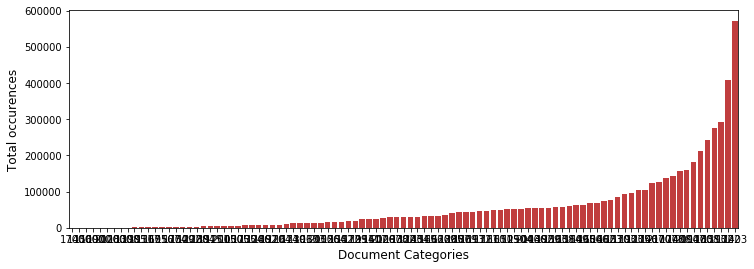

In [15]:
cat = pd.read_csv('./Desktop/openSW/input/documents_categories.csv')
print('Columns:', cat.columns.tolist())
print('Number of unique categories:', len(cat.category_id.unique()))

cat_ids = cat.groupby('category_id')['confidence_level'].count().sort_values()

for i in [1000, 10000, 50000, 100000]:
    print('Number of categories that appear more than {} times: {}'
          .format(i, (cat_ids > i).sum()))

plt.figure(figsize=(12, 4))
sns.barplot(cat_ids.index, cat_ids.values, order=cat_ids.index, alpha=1, color=p[3])
plt.xlabel('Document Categories', fontsize=12)
plt.ylabel('Total occurences', fontsize=12)
plt.show()